<a href="https://colab.research.google.com/github/SundharessB/machine-learing/blob/main/2348564_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import datetime  # Add this line


# Load and preprocess the dataset
df = pd.read_csv("/content/Groceries_dataset (1).csv")
# Assuming your dataset columns are named "Member_number," "Date," and "itemDescription"
transactions = df.groupby('Member_number')['itemDescription'].apply(list).tolist()

In [3]:
df


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [8]:
import threading
from mlxtend.frequent_patterns import fpgrowth, apriori
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Exception in thread Thread-18 (fp_growth_thread):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-8-6ed755b3bbd2>", line 9, in fp_growth_thread
  File "/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpgrowth.py", line 73, in fpgrowth
    fpc.valid_input_check(df)
  File "/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py", line 132, in valid_input_check
    raise ValueError(s)
ValueError: Th

In [16]:
transactions = df.groupby('Member_number')['itemDescription'].apply(list).tolist()

# Perform one-hot encoding
oht = df.groupby(['Member_number', 'itemDescription'])['itemDescription'].count().unstack().fillna(0)

def fp_growth_thread():
    # Run FP-growth algorithm
    fp_itemsets = fpgrowth(oht, min_support=0.01, use_colnames=True)

def apriori_thread():
    # Run Apriori algorithm
    apriori_itemsets = apriori(oht, min_support=0.01, use_colnames=True)

# Create and start threads
fp_thread = threading.Thread(target=fp_growth_thread)
apriori_thread = threading.Thread(target=apriori_thread)

start_time = datetime.datetime.now()

fp_thread.start()
apriori_thread.start()

fp_thread.join()
apriori_thread.join()

end_time = datetime.datetime.now()

# Calculate execution times
fp_execution_time = (end_time - start_time).total_seconds()
apriori_execution_time = (end_time - start_time).total_seconds()

# Plot execution times
algorithms = ['FP-growth', 'Apriori']
execution_times = [fp_execution_time, apriori_execution_time]



Exception in thread Thread-24 (fp_growth_thread):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-16-1b14c037b5f9>", line 8, in fp_growth_thread
  File "/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpgrowth.py", line 73, in fpgrowth
    fpc.valid_input_check(df)
  File "/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py", line 132, in valid_input_check
    raise ValueError(s)
ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 2.0
Exception in thread Thread-25 (apriori_thread):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  Fi

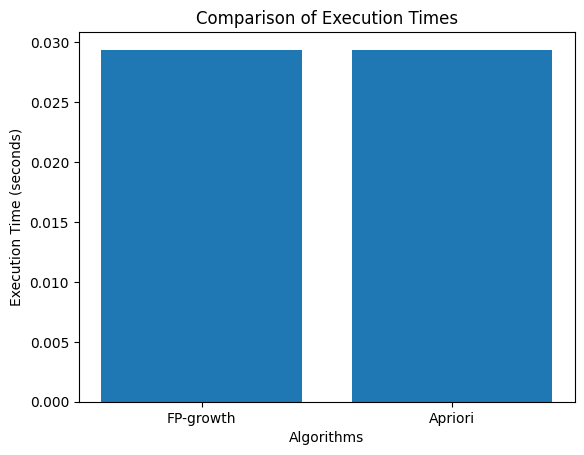

In [15]:
plt.bar(algorithms, execution_times)
plt.xlabel('Algorithms')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of Execution Times')
plt.show()